# Import dependencies

In [121]:
import os
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load datasets

In [122]:
report_periods = pd.read_csv('../data/report-periods.csv')

# Get all stock codes that has True value on  "12M 2023" column
stock_codes = report_periods[report_periods['12M 2023'] == True]['Kode'].tolist()

In [123]:
# Remove from stock codes
stock_codes.remove('PURE') # This stock has a lot of NaN values

In [124]:
# Variable to be extracted from the CSV files (column)
variables = [
    # Profitability & Efficiency (10)
    'Return on Equity (Annual)',
    'Return on Assets (Annual)',
    'Return on Capital Employed (Annual)',
    'EPS (Annual)',
    'EBITDA (Annual)',
    'Asset Turnover (Annual)',
    'Fixed Assets Turnover (Annual)',
    'Inventory Turnover (Annual)',
    'Receivables Turnover (Annual)',
    'Working Capital Turnover (Annual)',
    
    # Market Valuation (5)
    'PE Ratio (Annual)',
    'Price to Book Value (Annual)',
    'Price to Tang. Book Value (Annual)',
    'Price to Sales (Annual)',
    'Book Value Per Share (Annual)',
    
    # Cash Flow (3)
    'Operating Cash Flow (Annual)',
    'Free cash flow (Annual)',
    'Free cash flow per share (Annual)',
    
    # Liquidity (2)
    'Current Ratio (Annual)',
    'Quick Ratio (Annual)',
    
    # Solvency & Leverage (8)
    'Debt to Equity Ratio (Annual)',
    'Total Debt/Total Assets (Annual)',
    # 'LT Debt/Equity (Annual)', # This variable is equal in all rows, so it is not useful
    # 'LT Debt/Total Assets (Annual)', # This variable is equal in all rows, so it is not useful
    'Net Debt/Total Equity (Annual)',
    'Total Liabilities/Equity (Annual)',
    'Financial Leverage (Annual)',
    'Interest Coverage (Annual)',
    
    # Cash Conversion Cycle (4)
    'Days Sales Outstanding (Annual)',
    'Days Inventory (Annual)',
    'Payables Period (Annual)',
    'Cash Conversion Cycle (Annual)'
]

# Periods to be extracted from the CSV files (row)
periods = ['12M 2023']

In [125]:
financial_reports = pd.DataFrame()

for stock_code in stock_codes:
    print(f'Processing stock code: {stock_code}')

    financials_path = os.path.join(
        '..', 'data', 'financials', stock_code, 'annual', '*.csv'
    )

    financials = glob.glob(financials_path)

    financial_report = pd.DataFrame(columns=['Kode'])
    # Fill first row with stock code
    financial_report.loc[0, 'Kode'] = stock_code

    for financial in financials:
        # Read the stock financials from CSV file
        df = pd.read_csv(financial, index_col=None, header=0)
        # Get the specific row based on the periods
        df = df[df['Period'].isin(periods)].reset_index(drop=True)

        financial_report = pd.concat([financial_report, df], axis=1)

    # Select only the variables of interest
    financial_report = financial_report[['Kode'] + variables]

    financial_reports = pd.concat([financial_reports, financial_report], ignore_index=True)

financial_reports.head()

Processing stock code: AALI
Processing stock code: ABBA
Processing stock code: ABDA
Processing stock code: ABMM
Processing stock code: ACES
Processing stock code: ACST
Processing stock code: ADES
Processing stock code: ADHI
Processing stock code: ADMF
Processing stock code: ADMG
Processing stock code: ADRO
Processing stock code: AGII
Processing stock code: AGRO
Processing stock code: AGRS
Processing stock code: AHAP
Processing stock code: AIMS
Processing stock code: AISA
Processing stock code: AKKU
Processing stock code: AKPI
Processing stock code: AKRA
Processing stock code: AKSI
Processing stock code: ALDO
Processing stock code: ALKA
Processing stock code: ALMI
Processing stock code: ALTO
Processing stock code: AMAG
Processing stock code: AMFG
Processing stock code: AMIN
Processing stock code: AMRT
Processing stock code: ANJT
Processing stock code: ANTM
Processing stock code: APEX
Processing stock code: APIC
Processing stock code: APII
Processing stock code: APLI
Processing stock cod

,Kode,Return on Equity (Annual),Return on Assets (Annual),Return on Capital Employed (Annual),EPS (Annual),EBITDA (Annual),Asset Turnover (Annual),Fixed Assets Turnover (Annual),Inventory Turnover (Annual),Receivables Turnover (Annual),...,Debt to Equity Ratio (Annual),Total Debt/Total Assets (Annual),Net Debt/Total Equity (Annual),Total Liabilities/Equity (Annual),Financial Leverage (Annual),Interest Coverage (Annual),Days Sales Outstanding (Annual),Days Inventory (Annual),Payables Period (Annual),Cash Conversion Cycle (Annual)
0,AALI,4.80%,3.66%,4.80%,548.61,"2,614.63 B",0.71,2.29,5.85,27.24,...,0.18,0.14,0.09,0.29,1.31,4.66,13.40,62.44,20.98,54.86
1,ABBA,-226.34%,-16.12%,-37.63%,-11.10,(39.96 B),0.61,9.06,32.21,4.59,...,0.89,0.06,-0.74,19.52,14.04,-12.40,79.44,11.33,143.95,-53.18
2,ABDA,5.46%,3.17%,-3.51%,136.24,(79.79 B),0.25,9.26,NaN,NaN,...,0.00,0.00,0.00,0.72,0.00,NaN,NaN,NaN,NaN,NaN
3,ABMM,37.62%,13.24%,20.80%,1601.26,"8,358.98 B",0.71,2.27,19.87,5.16,...,1.37,0.48,1.12,1.84,2.84,2.88,70.73,18.37,81.23,7.87
4,ACES,12.53%,9.88%,14.80%,44.92,"1,476.23 B",1.01,17.93,1.43,53.64,...,0.01,0.01,-0.36,0.26,1.27,24.07,6.81,255.83,12.49,250.15


In [126]:
clean_financial_reports = financial_reports.copy().dropna(axis=0)

In [127]:
# Remove % from values on 'Return on Equity (Annual)', 'Return on Assets (Annual)', and
# 'Return on Capital Employed (Annual)', and convert columns to float
for col in ['Return on Equity (Annual)', 'Return on Assets (Annual)', 'Return on Capital Employed (Annual)']:
    clean_financial_reports[col] = clean_financial_reports[col].str.replace('%', '').astype(float)

In [128]:
# Convert from string to float, remove 'B' suffix, and convert value that contained inside () into negative value
for col in ['Operating Cash Flow (Annual)', 'EBITDA (Annual)', 'Free cash flow (Annual)']:
    clean_financial_reports[col] = clean_financial_reports[col].str.replace(' B', '').str.replace(
        '(', '-').str.replace(')', '').str.replace(',', '').astype(float)

In [129]:
clean_financial_reports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 907
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Kode                                 569 non-null    object 
 1   Return on Equity (Annual)            569 non-null    float64
 2   Return on Assets (Annual)            569 non-null    float64
 3   Return on Capital Employed (Annual)  569 non-null    float64
 4   EPS (Annual)                         569 non-null    float64
 5   EBITDA (Annual)                      569 non-null    float64
 6   Asset Turnover (Annual)              569 non-null    float64
 7   Fixed Assets Turnover (Annual)       569 non-null    float64
 8   Inventory Turnover (Annual)          569 non-null    float64
 9   Receivables Turnover (Annual)        569 non-null    float64
 10  Working Capital Turnover (Annual)    569 non-null    float64
 11  PE Ratio (Annual)                    

In [130]:
clean_financial_reports.describe()

,Return on Equity (Annual),Return on Assets (Annual),Return on Capital Employed (Annual),EPS (Annual),EBITDA (Annual),Asset Turnover (Annual),Fixed Assets Turnover (Annual),Inventory Turnover (Annual),Receivables Turnover (Annual),Working Capital Turnover (Annual),...,Debt to Equity Ratio (Annual),Total Debt/Total Assets (Annual),Net Debt/Total Equity (Annual),Total Liabilities/Equity (Annual),Financial Leverage (Annual),Interest Coverage (Annual),Days Sales Outstanding (Annual),Days Inventory (Annual),Payables Period (Annual),Cash Conversion Cycle (Annual)
count,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,5.617979,2.847381,3.394271,1.165035e+04,1149.610896,0.962039,25.906327,53.139438,44.945132,19.167856,...,0.680826,0.308032,0.433726,1.730264,2.803585,277.711634,60.666309,402.329543,358.955325,100.747680
std,127.697477,15.048587,91.303253,1.736303e+05,3998.352247,1.299259,233.544921,334.096304,305.078498,2456.444887,...,2.481243,1.464594,2.194559,9.802163,9.857183,7996.135554,103.002272,3113.388955,6895.525054,3972.128945
min,-1954.830000,-167.100000,-1557.410000,-1.223170e+03,-7607.820000,0.010000,0.010000,0.010000,0.210000,-36682.380000,...,-8.050000,0.000000,-7.550000,-21.950000,-20.590000,-109382.240000,0.080000,0.070000,0.020000,-92195.860000
25%,0.360000,0.070000,1.810000,1.400000e-01,20.080000,0.340000,1.010000,2.530000,5.340000,0.420000,...,0.040000,0.040000,-0.110000,0.290000,1.320000,0.660000,21.640000,29.350000,24.240000,21.710000
50%,6.900000,3.140000,8.780000,1.224000e+01,157.310000,0.640000,2.480000,5.420000,8.590000,2.230000,...,0.270000,0.160000,0.100000,0.700000,1.750000,3.340000,42.500000,67.360000,43.520000,65.850000
75%,14.020000,7.490000,15.970000,6.349000e+01,675.870000,1.210000,5.860000,12.430000,16.870000,5.570000,...,0.700000,0.320000,0.500000,1.440000,2.560000,12.210000,68.330000,144.200000,72.770000,158.670000
max,2197.150000,94.360000,110.980000,2.993415e+06,57330.000000,22.440000,4559.740000,5262.650000,4678.500000,45300.920000,...,42.470000,29.820000,38.830000,190.310000,191.310000,117080.440000,1776.930000,71504.390000,164518.780000,12658.780000


In [131]:
clean_financial_reports.isnull().sum()

Kode                                   0
Return on Equity (Annual)              0
Return on Assets (Annual)              0
Return on Capital Employed (Annual)    0
EPS (Annual)                           0
EBITDA (Annual)                        0
Asset Turnover (Annual)                0
Fixed Assets Turnover (Annual)         0
Inventory Turnover (Annual)            0
Receivables Turnover (Annual)          0
Working Capital Turnover (Annual)      0
PE Ratio (Annual)                      0
Price to Book Value (Annual)           0
Price to Tang. Book Value (Annual)     0
Price to Sales (Annual)                0
Book Value Per Share (Annual)          0
Operating Cash Flow (Annual)           0
Free cash flow (Annual)                0
Free cash flow per share (Annual)      0
Current Ratio (Annual)                 0
Quick Ratio (Annual)                   0
Debt to Equity Ratio (Annual)          0
Total Debt/Total Assets (Annual)       0
Net Debt/Total Equity (Annual)         0
Total Liabilitie

In [132]:
def find_optimal_clusters(data, max_k=10):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

# Run elbow method to find the optimal number of clusters
inertia = find_optimal_clusters(clean_financial_reports.select_dtypes(include=['float64', 'int64']))

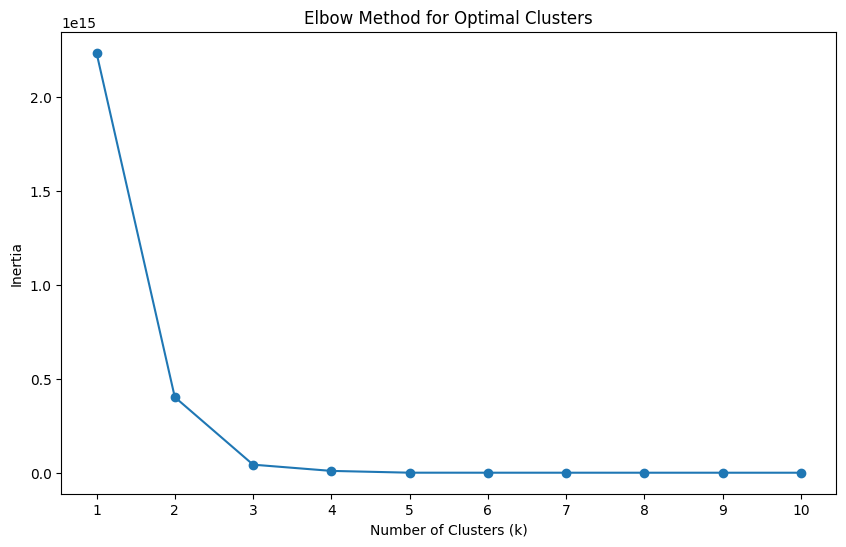

In [133]:
# Plot a graph to visualize the inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, len(inertia) + 1))
plt.show()

In [134]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(clean_financial_reports.select_dtypes(include=['float64', 'int64']))